# Classification regression

In this example, I will be folloing the example at page-158 of chapter-5 on the 'German credit rating dataset'. 

**About the datasets:** German credit rating dataset is available at the University of California
Irvine (UCI) machine learning laboratory to predict whether a credit is a good or bad credit. Credit
classification is one of the popular classification problems encountered by financial institutions. For
example, when a customer applies for a loan, financial institutions such as banks would like to predict
the probability of default. In this jupyter notebook, we will be using the German credit rating dataset provided by Prof. Hofmann (available at UCI machine learning data repository). 

The data contains several attributes of the persons who availed the credit.

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
credit_df = pd.read_csv('D:\Arun 2022\Github\Machine-Learning\ml-data\German Credit Data.csv')

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


The dataset contains 1000 records and 14 columns. 

In [5]:
credit_df.iloc[0:5, 1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [6]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [66]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [11]:
credit_df['checkin_acc'].unique()

array(['A11', 'A12', 'A14', 'A13'], dtype=object)

There are few columns which are categorical and have been inferred as objects. For example, checkin_acc
has following categories:


| Credit Rating	| Description | Money |
|---------------|-------------|-------|
| A11	| Very poor creditworthiness. The debtor has no or negative assets. | No checking account |
| A12	| Poor creditworthiness. The debtor has some assets, but these are not sufficient to cover their liabilities. | Checking account with < 200 DM |
| A13	| Good creditworthiness. The debtor has sufficient assets to cover their liabilities. They have a regular income from salary assignments and have been receiving these payments for at least one year. | Checking account with >= 200 DM and at least one year of salary assignments |
| A14	| No checking account. The debtor does not have a checking account. This can make it difficult for them to manage their finances and may indicate that they are financially unstable. | Checking account with >= 200 DM and no salary assignments |

(above 'DM' represents `Deutsche Mark`)

In [10]:
credit_df['job'].unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

- A173: Unskilled laborer
- A172: Skilled laborer
- A174: Employee
- A171: Civil servant

In [13]:
credit_df['duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [15]:
credit_df['credit_history'].unique()

array(['A34', 'A32', 'A33', 'A30', 'A31'], dtype=object)

- A34: No credit history
- A32: Less than 0.5 years of credit history
- A33: 0.5 to 1.5 years of credit history
- A30: 1.5 to 4 years of credit history
- A31: More than 4 years of credit history

In [17]:
credit_df['savings_acc'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

- A65: No savings account or negative savings
- A61: 0 <= Savings < 750 DM
- A63: 750 <= Savings < 1500 DM
- A64: 1500 <= Savings < 3000 DM
- A62: Savings >= 3000 DM

In [18]:
credit_df['present_emp_since'].unique()

array(['A75', 'A73', 'A74', 'A71', 'A72'], dtype=object)

- A75: Employed less than 1 year
- A73: Employed 1 to 4 years
- A74: Employed 5 to 7 years
- A71: Employed 8 to 10 years
-A72: Employed more than 10 years

In [19]:
credit_df['inst_rate'].unique()

array([4, 2, 3, 1], dtype=int64)

| Value	| Interpretation |
|-------|----------------|
| 1 | Low installment rate (< 20%) |
| 2	| Moderate installment rate (20% - 39%) |
| 3	| High installment rate (40% - 59%) |
| 4	| Very high installment rate (>= 60%) |

In [20]:
credit_df['personal_status'].unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

- A93: Married
- A92: Single (never married)
- A91: Divorced
- A94: Widowed

In [21]:
credit_df['residing_since'].unique()

array([4, 2, 3, 1], dtype=int64)

| Value | Description |
|-------|--------------|
| 1  | Less than 1 year |
| 2 | 1 to 4 years |
| 3 | 5 to 7 years |
| 4 | More than 7 years |

In [22]:
credit_df['age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [23]:
credit_df['inst_plans'].unique()

array(['A143', 'A141', 'A142'], dtype=object)

| Value	| Interpretation |
|-------|----------------|
| A143	| No installment plans |
| A141	| Regular installment plans |
| A142	| Irregular installment plans |

In [24]:
credit_df['num_credits'].unique()

array([2, 1, 3, 4], dtype=int64)

| Value	| Interpretation |
|-------|----------------|
| 1	| 1 to 2 existing credits |
| 2	| 3 to 4 existing credits |
| 3	| 5 to 6 existing credits |
| 4	| More than 6 existing credits |

In [25]:
credit_df['status'].unique()

array([0, 1], dtype=int64)

| value | Interpretation |
|---|---|
| 0 | Good credit standing (paid off loan) |
| 1 | Bad credit standing (loan defaulted) |

In [26]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

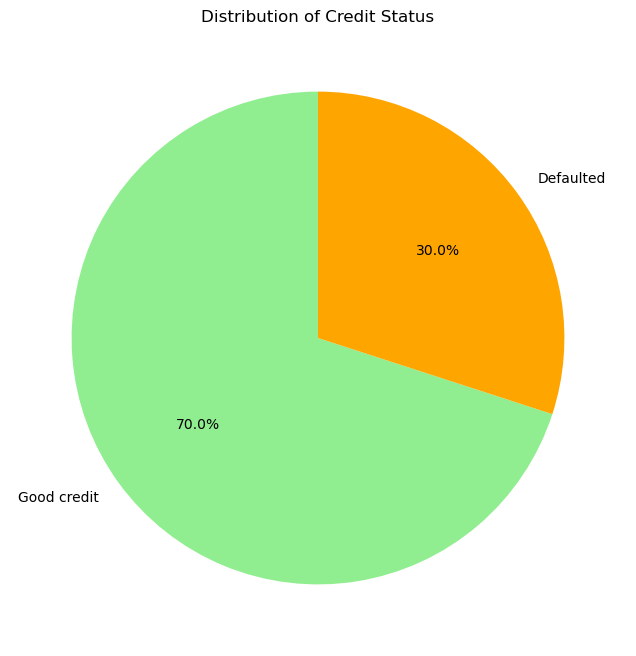

In [41]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(credit_df['status'].value_counts(), labels=['Good credit', 'Defaulted'], autopct='%1.1f%%', startangle=90, colors=['lightgreen','orange'])
plt.title('Distribution of Credit Status')
plt.show()

The output displays that there are 700 observations of good credit and 300 observations of bad credit.

For building a classification model, the status column will be used as the dependent variable, while
the remaining columns will be independent variables or features. We will create a list named X_features and store the names of all independent variables for future use.

In [44]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status'],
      dtype='object')

In [43]:
X_features = credit_df.iloc[:, :-1]

X_features

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173


In [46]:
features_list = credit_df.columns[:-1].tolist()

- **Encoding Categorical Features**
  Qualitative variables or categorical variables need to be encoded using `dummy variables` before incorporating them in the regression model. If a categorical variable has `n` categories (e.g., the player role in the data has four categories, namely, batsman, bowler, wicket-keeper and allrounder), then we will need `n − 1` dummy variables. So, in the case of PLAYING ROLE, we will need three dummy variables since there are four categories

**Dummy variables:** Let's take a example

| PLAYER  | PLAYING ROLE  |
|---------|---------------|
| Player1 | Batsman       |
| Player2 | Bowler        |
| Player3 | All-Rounder   |


Dummy variables:

| PLAYER  | Batsman | Bowler | All-Rounder |
|---------|---------|--------|-------------|
| Player1 | 1       | 0      | 0           |
| Player2 | 0       | 1      | 0           |
| Player3 | 0       | 0      | 1           |


In [58]:
encoded_credit_df = pd.get_dummies(credit_df[features_list], drop_first=True).astype(int)

In [59]:
encoded_credit_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


Displaying the dummy features to verify how they are encoded.

In [60]:
encoded_credit_df[['checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14']].head()

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


The first record has all the dummy variable values set to 0, indicating it is checkin account type `checkin_acc_A11`, which is the base category. The account type in second observation is `checkin_acc_A12`, so on.

- **Creating feature X and outcome y variables:**

In [64]:
import statsmodels.api as sm 
X = sm.add_constant(encoded_credit_df)
y = credit_df.status

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'credit_df' is your DataFrame
# Encode categorical variables if needed
le = LabelEncoder()
categorical_columns = ['checkin_acc', 'credit_history', 'savings_acc', 'present_emp_since', 'personal_status', 'inst_plans', 'job', 'status']
for col in categorical_columns:
    credit_df[col] = le.fit_transform(credit_df[col])

# Define features and target variable
X = credit_df.drop('status', axis=1)
y = credit_df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.76
Confusion Matrix:
[[128  13]
 [ 35  24]]


In [68]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Generate some example data from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Define the likelihood function for a normal distribution
def likelihood(params, data):
    mu, sigma = params
    log_likelihood = -np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return log_likelihood

# MLE estimation using optimization
initial_guess = [np.mean(data), np.std(data)]  # Starting with sample mean and standard deviation
result = minimize(likelihood, initial_guess, args=(data,), method='L-BFGS-B')

# Extract the estimated parameters
mu_mle, sigma_mle = result.x

# Display the results
print(f"True Mean: {np.mean(data):.2f}, True Standard Deviation: {np.std(data):.2f}")
print(f"MLE Estimated Mean: {mu_mle:.2f}, MLE Estimated Standard Deviation: {sigma_mle:.2f}")


True Mean: 4.79, True Standard Deviation: 1.81
MLE Estimated Mean: 4.79, MLE Estimated Standard Deviation: 1.81


In [70]:
import numpy as np

# Example data and model
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent
learning_rate = 0.01
num_iterations = 1000
theta = np.random.randn(2, 1)

for iteration in range(num_iterations):
    gradients = 2 / len(X) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Display result
print("Gradient Descent: theta =", theta.ravel())


Gradient Descent: theta = [1.24193681 1.57545992]


In [71]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Example data
data = np.random.normal(loc=3, scale=2, size=100)

# Likelihood function for normal distribution
def likelihood(params, data):
    mu, sigma = params
    log_likelihood = -np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return log_likelihood

# MLE estimation using optimization
initial_guess = [np.mean(data), np.std(data)]
result = minimize(likelihood, initial_guess, args=(data,), method='L-BFGS-B')

# Extract the estimated parameters
mu_mle, sigma_mle = result.x

# Display results
print(f"True Mean: {np.mean(data):.2f}, True Standard Deviation: {np.std(data):.2f}")
print(f"MLE Estimated Mean: {mu_mle:.2f}, MLE Estimated Standard Deviation: {sigma_mle:.2f}")


True Mean: 2.73, True Standard Deviation: 1.96
MLE Estimated Mean: 2.73, MLE Estimated Standard Deviation: 1.96
